In [1]:
import os
import bls_cpu as gbls
import transitPy5 as tpy5
import transitfit5 as tf5
import utils_python.transitfit as transitf
import utils_python.transitplot as transitp
import importlib
import numpy as np
import pandas as pd

In [10]:
def createResultFile(fileLoc, id_to_save):
    header = np.array(["ρ (g/cm³)", "c1", "c2", "q1", "q2",
     "Dilution", "V. Offset", "Zpt",
     "t0 (days)", "P (days)", "b", "Rp/R*",
     "sqrt(e)cos(w)", "sqrt(e)sin(w)", "RV amp. (m/s)",
     "Eclipse depth (ppm)", "Ell var. (ppm)", "Albedo amp. (ppm)"])[id_to_save]
    df = pd.DataFrame(np.insert(header, 0, ["tic", "BLS Power", "BLS Depth (ppm)"])).T
    df.to_csv(fileLoc, index=False, header=False)

def analyseData(fileLoc, gbls_inputs):
     # Read data
    phot = tpy5.readphot(fileLoc)
    
    # bls it
    gbls_inputs.zerotime = min(phot.time)
    gbls_ans = gbls.bls(gbls_inputs, phot.time[phot.icut == 0], phot.flux[phot.icut == 0])
    
    # Fit it
    sol_fit = transitf.fitFromBLS(gbls_ans, phot.time - gbls_inputs.zerotime, phot.flux + 1, phot.ferr, phot.itime)

    return phot, sol_fit

freqs:  0.005603552331655075 2.0
nstep:  129976


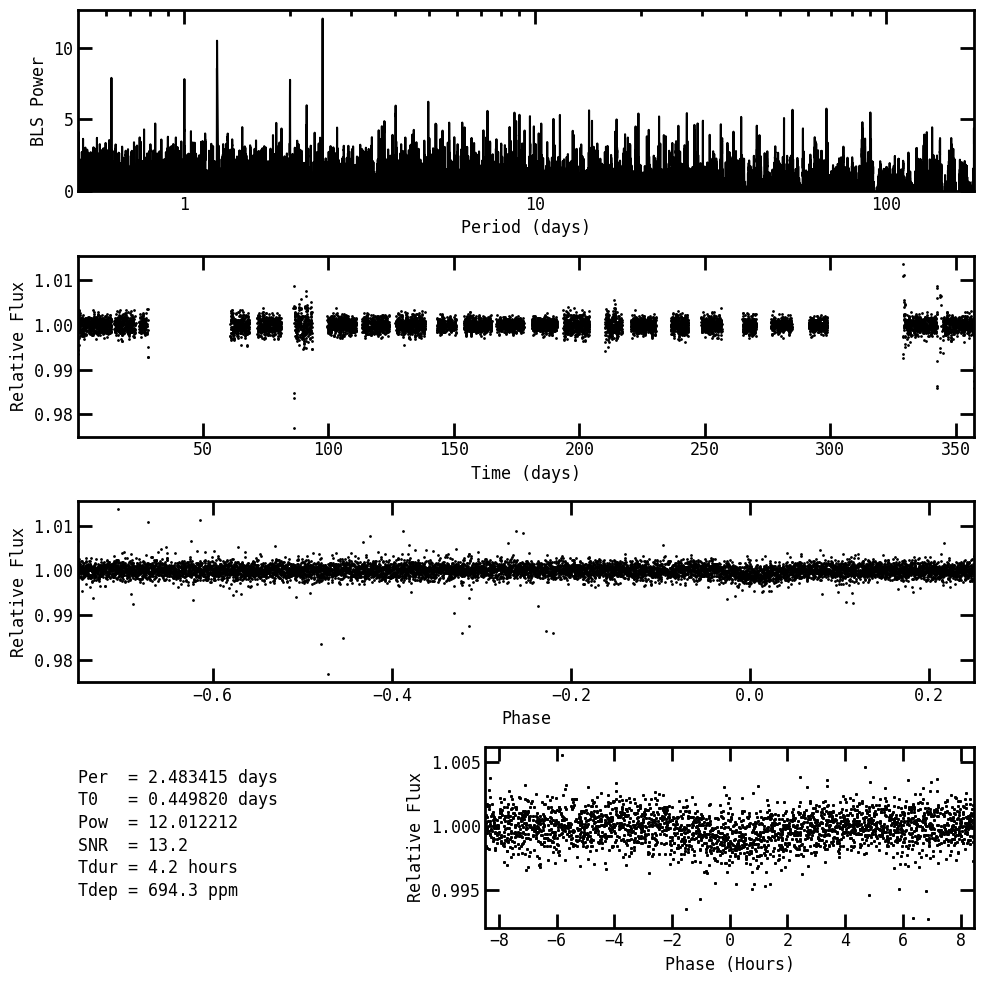

ρ (g/cm³):                      0.3725013
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:         2.501e-05
t0 (days):                      0.4421657
Period (days):                  2.4835850
Impact parameter:               0.6269877
Rp/R*:                          0.0289465
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


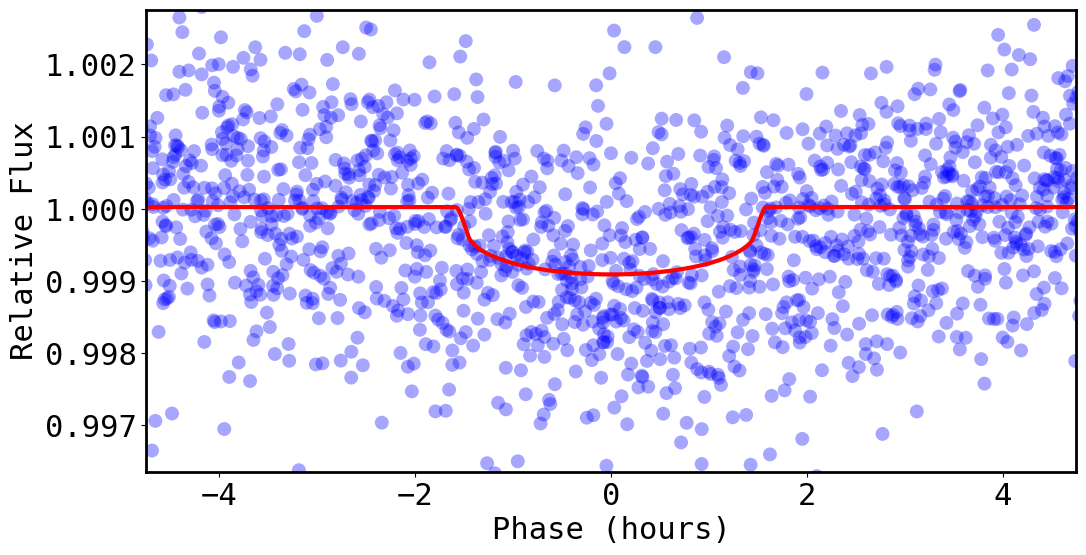

In [5]:
# Single light curve

tic = 29991541
datadir = "/data2/TESS/ffisearch/cvzsearch_yr1/cvz1pt003/tlc" + str(tic) + "/tlc" + str(tic) + "_5.dn.dat"

gbls_inputs = gbls.gbls_inputs_class()
phot, sol_fit = analyseData(datadir, gbls_inputs)

transitp.printParams(sol_fit)
transitp.plotTransit(phot.time - gbls_inputs.zerotime, phot.flux + 1, sol_fit, phot.itime)

#0 - tlc29990038
freqs:  0.0056022444742625755 2.0
nstep:  144754


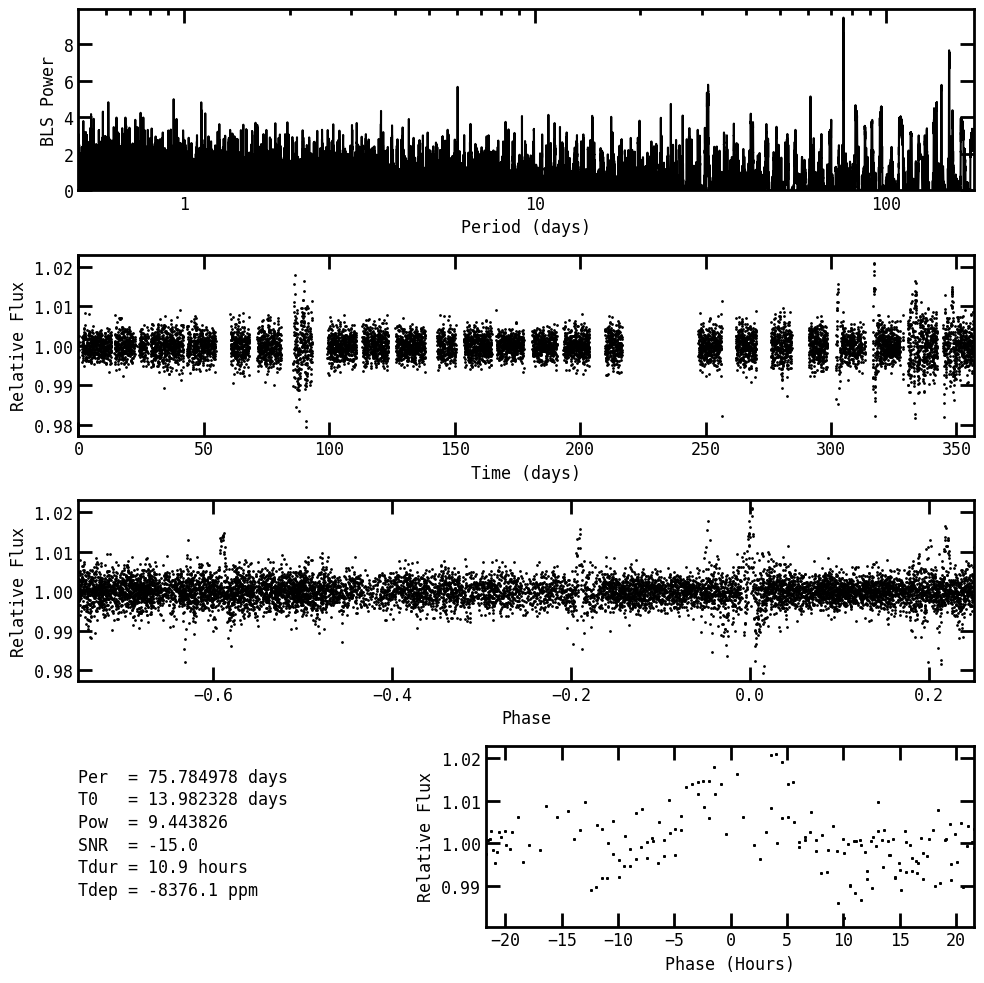

ρ (g/cm³):                      0.6324103
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:         2.100e-05
t0 (days):                     15.9512089
Period (days):                 75.1702764
Impact parameter:               0.5114811
Rp/R*:                          2.733e-05
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


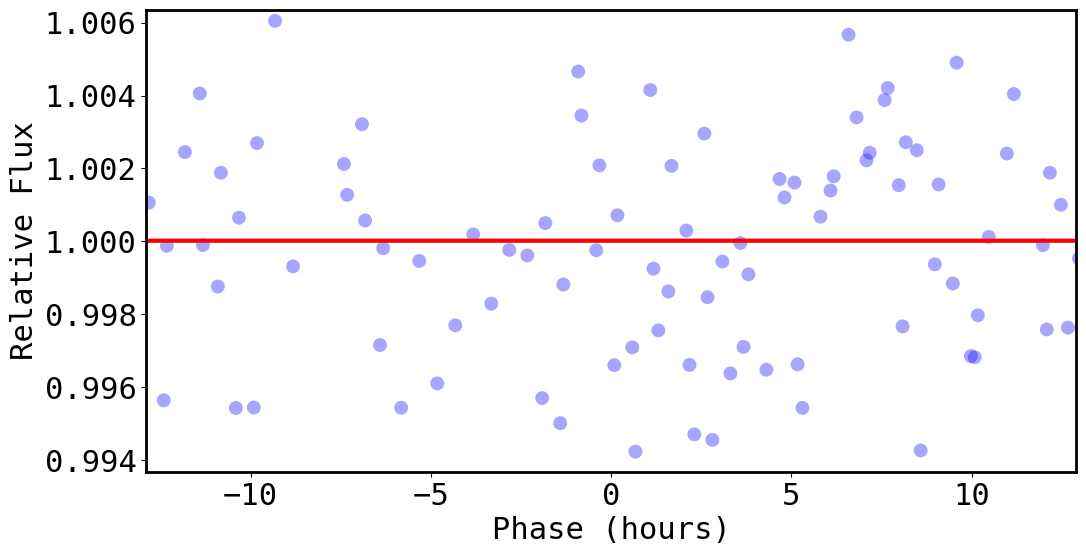


#1 - tlc29926002
freqs:  0.005602243799482079 2.0
nstep:  150605


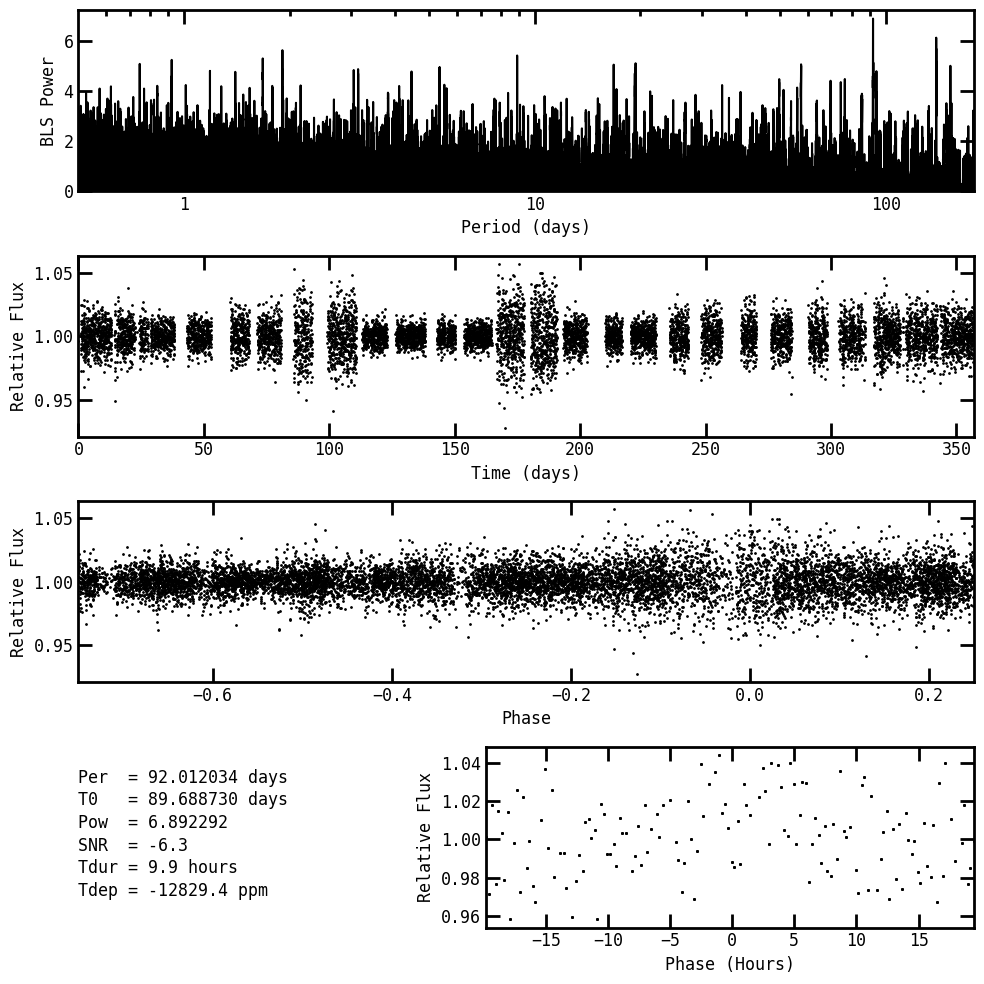

ρ (g/cm³):                      0.6414699
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:         7.741e-06
t0 (days):                     76.7917847
Period (days):                 87.0022989
Impact parameter:               0.5303442
Rp/R*:                          1.000e-05
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


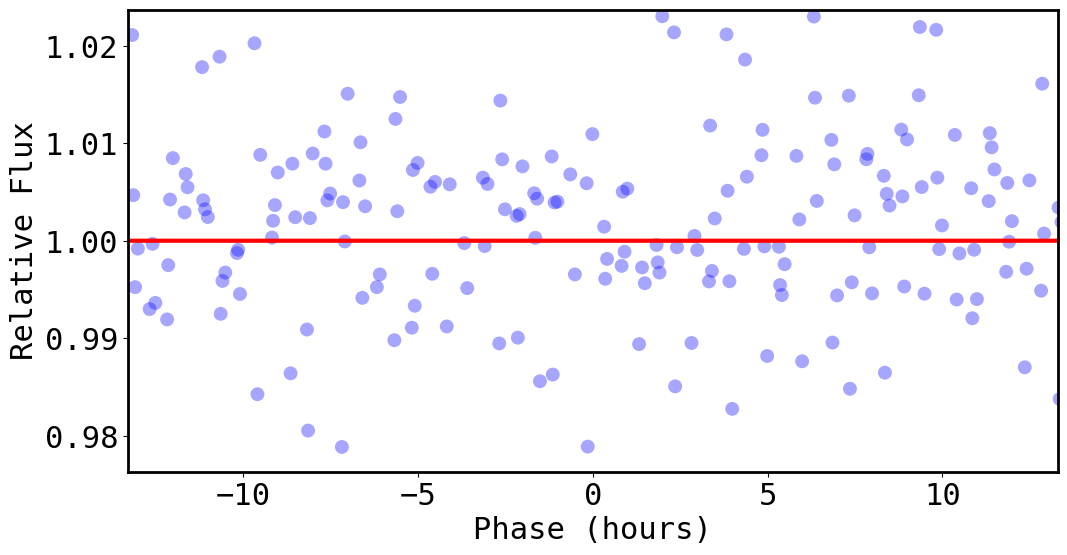


#2 - tlc29926178
freqs:  0.005602243830867219 2.0
nstep:  151465


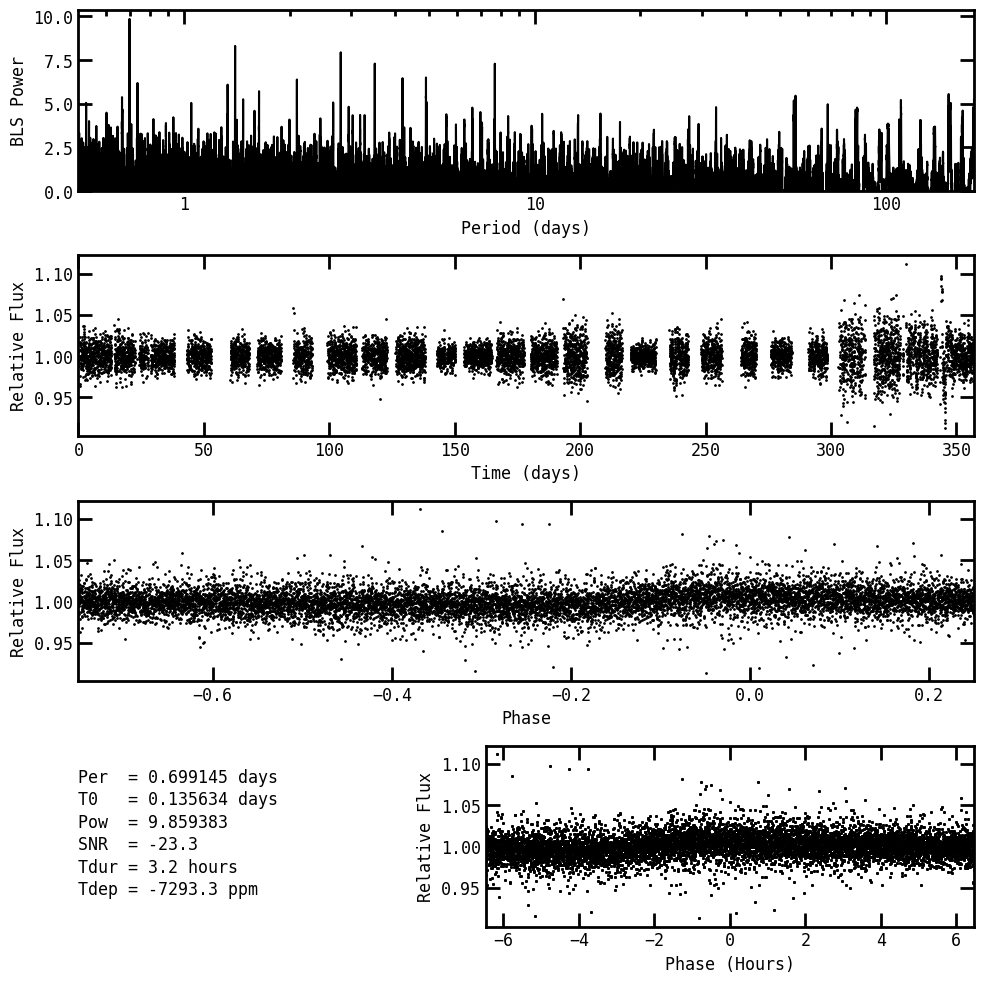

ρ (g/cm³):                      0.7668873
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:         6.000e-05
t0 (days):                      0.5152350
Period (days):                  0.7071295
Impact parameter:               0.5028132
Rp/R*:                          6.283e-03
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


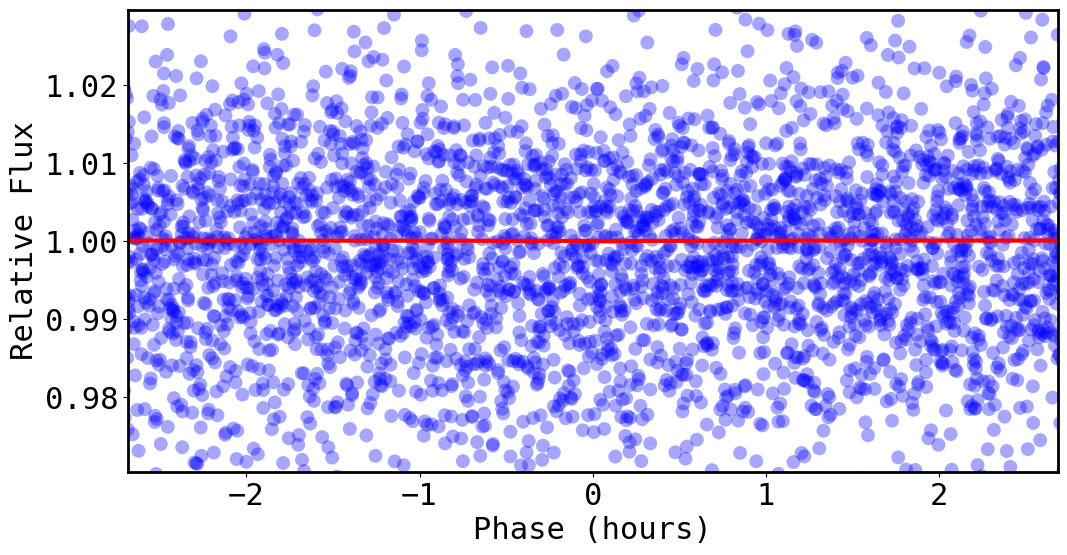


#3 - tlc29833081
freqs:  0.006094080549594411 2.0
nstep:  130517


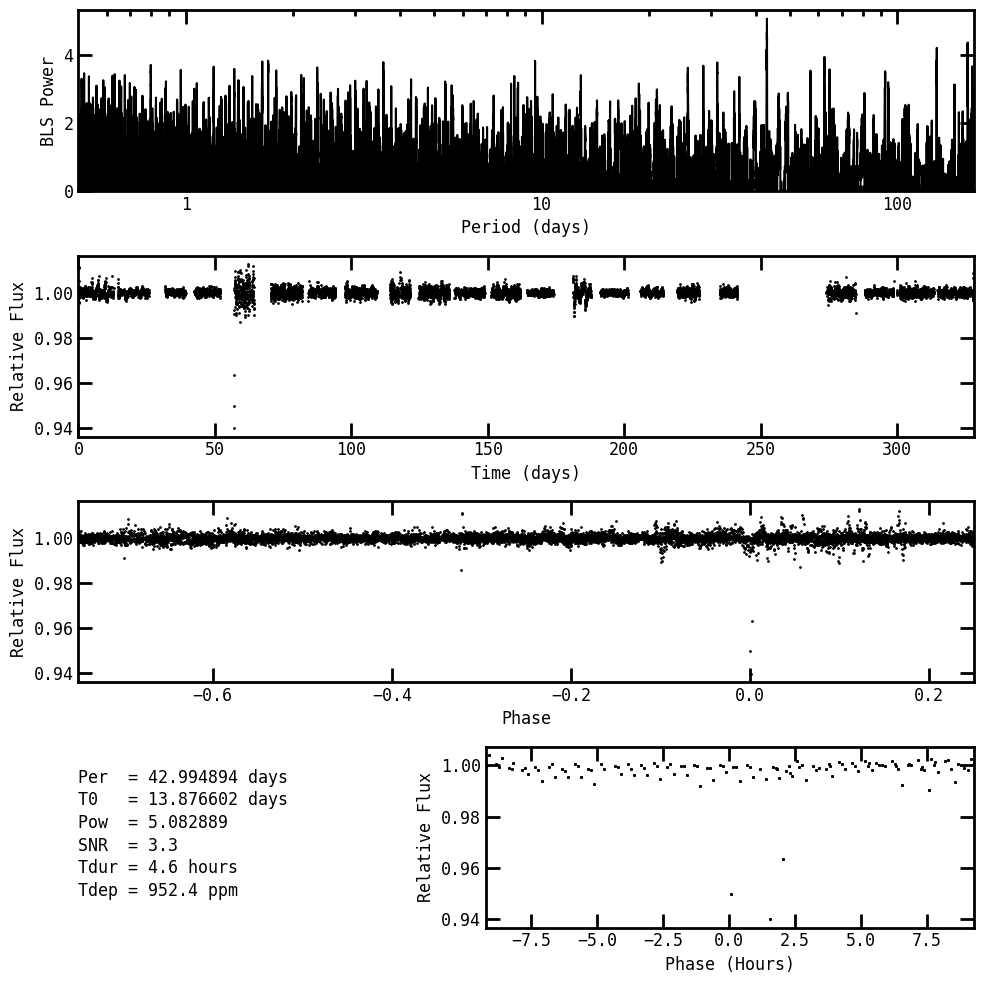

ρ (g/cm³):                      1.4671100
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:         7.434e-06
t0 (days):                     13.9288531
Period (days):                 42.9859861
Impact parameter:               0.8405504
Rp/R*:                          0.1059877
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


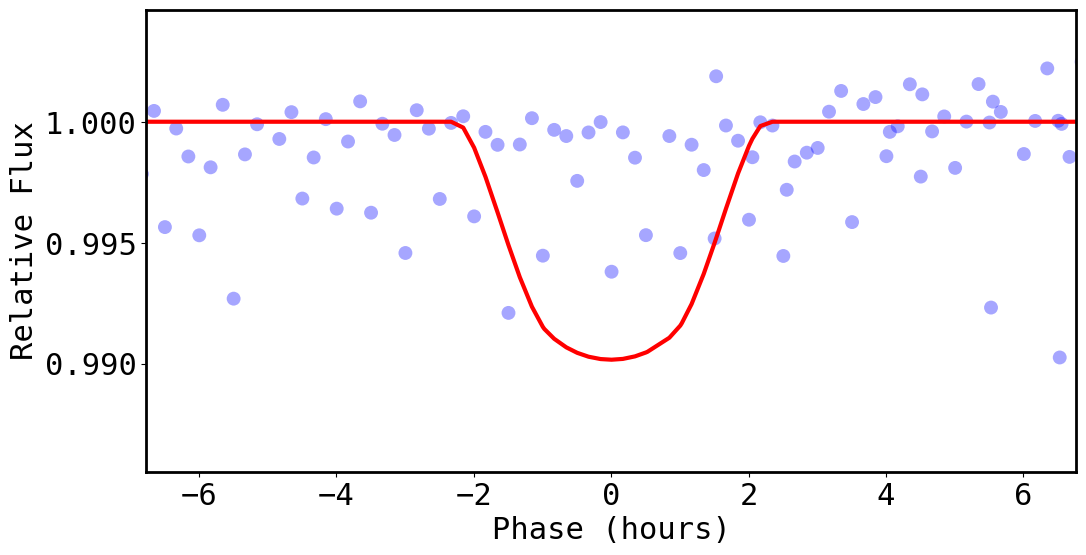


#4 - tlc29833162
freqs:  0.006094080735283505 2.0
nstep:  127390


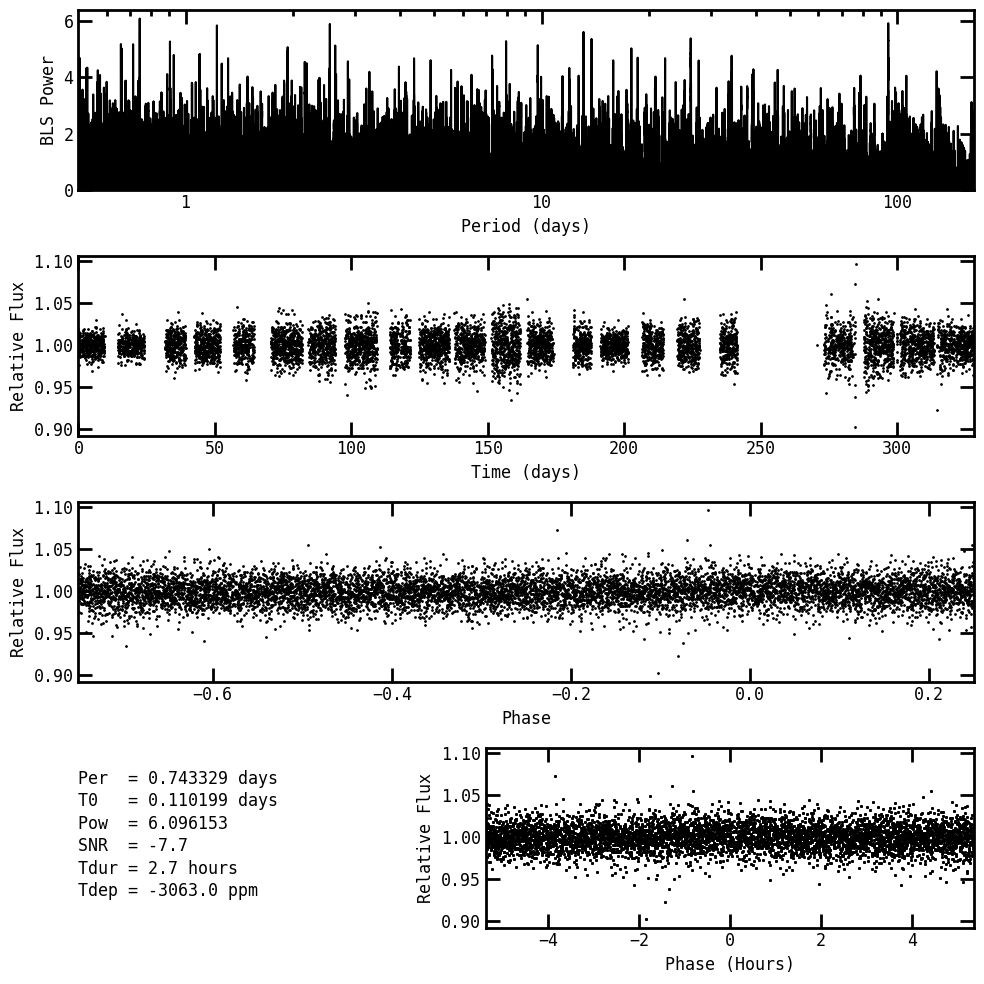

ρ (g/cm³):                      0.7875906
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:        -3.373e-05
t0 (days):                      0.1451431
Period (days):                  0.7416031
Impact parameter:               0.6089287
Rp/R*:                          1.001e-05
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


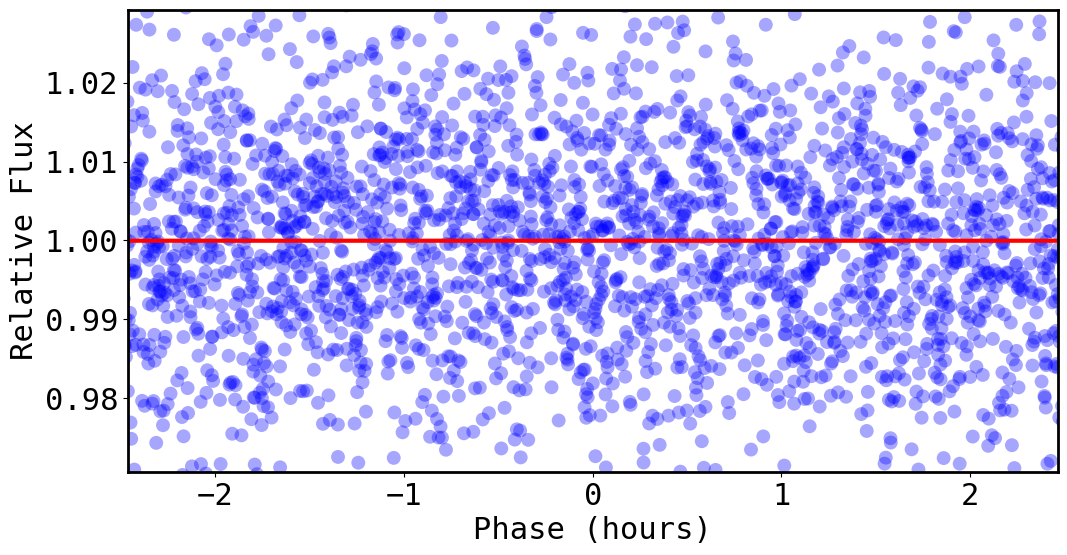


#5 - tlc29831656
freqs:  0.005602244442877433 2.0
nstep:  137420


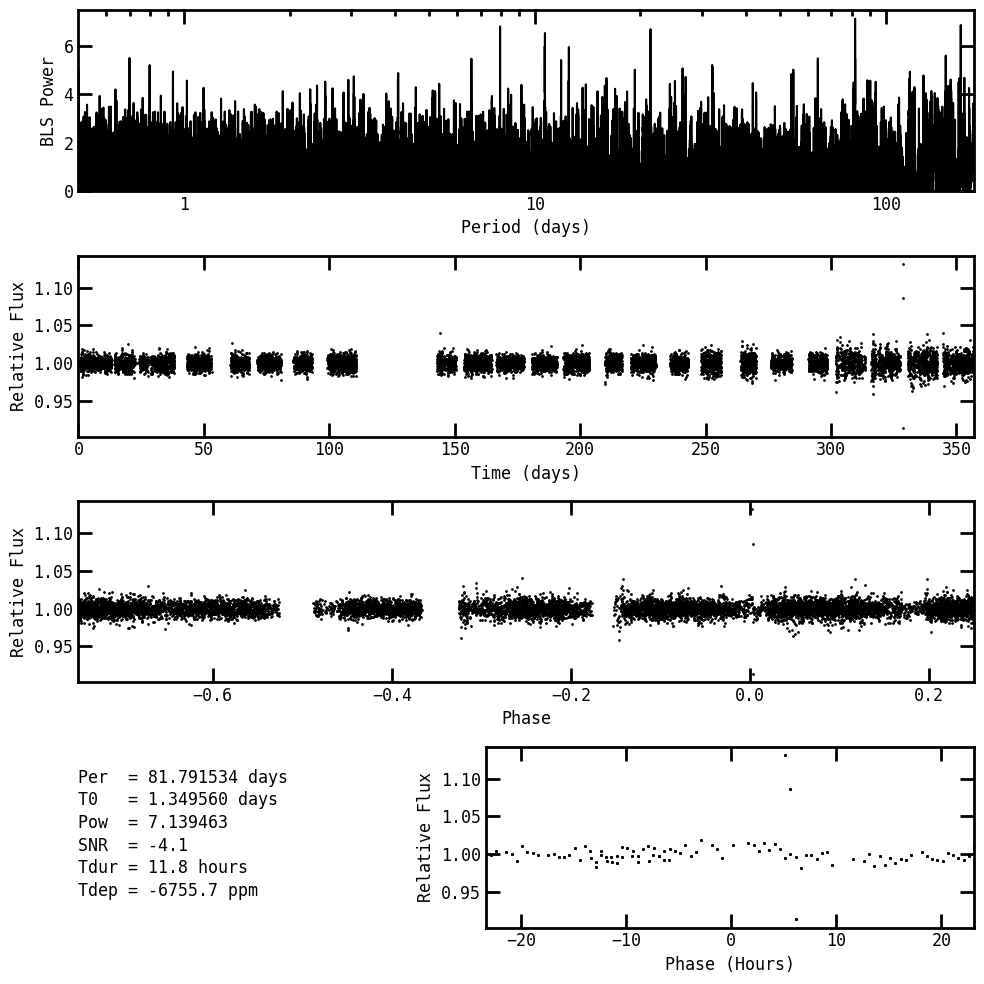

ρ (g/cm³):                      0.7613042
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:         4.060e-05
t0 (days):                      0.9230558
Period (days):                 81.7595309
Impact parameter:               0.5928393
Rp/R*:                          1.000e-05
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


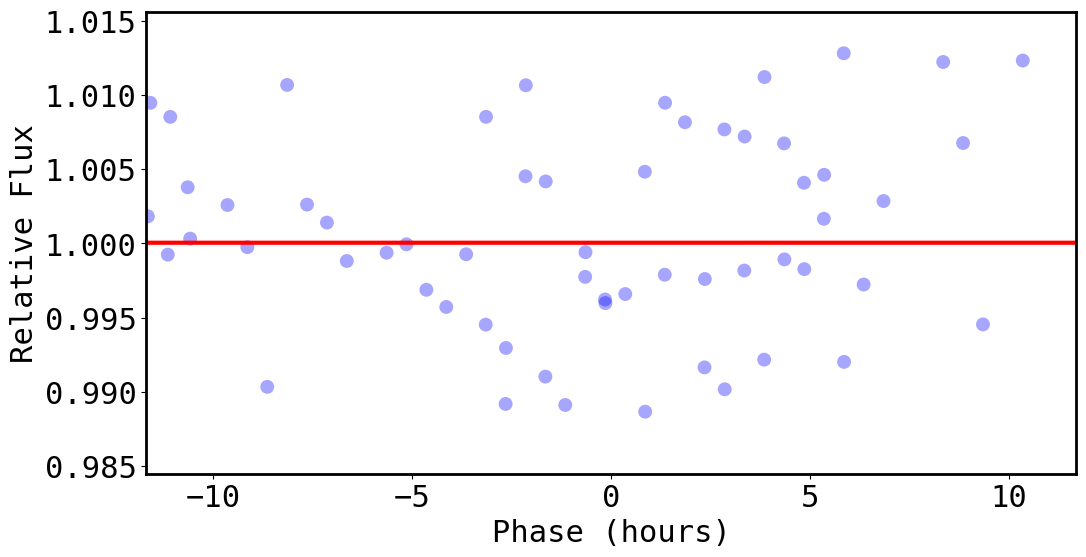


#6 - tlc29985440
freqs:  0.005602244081948313 2.0
nstep:  153594


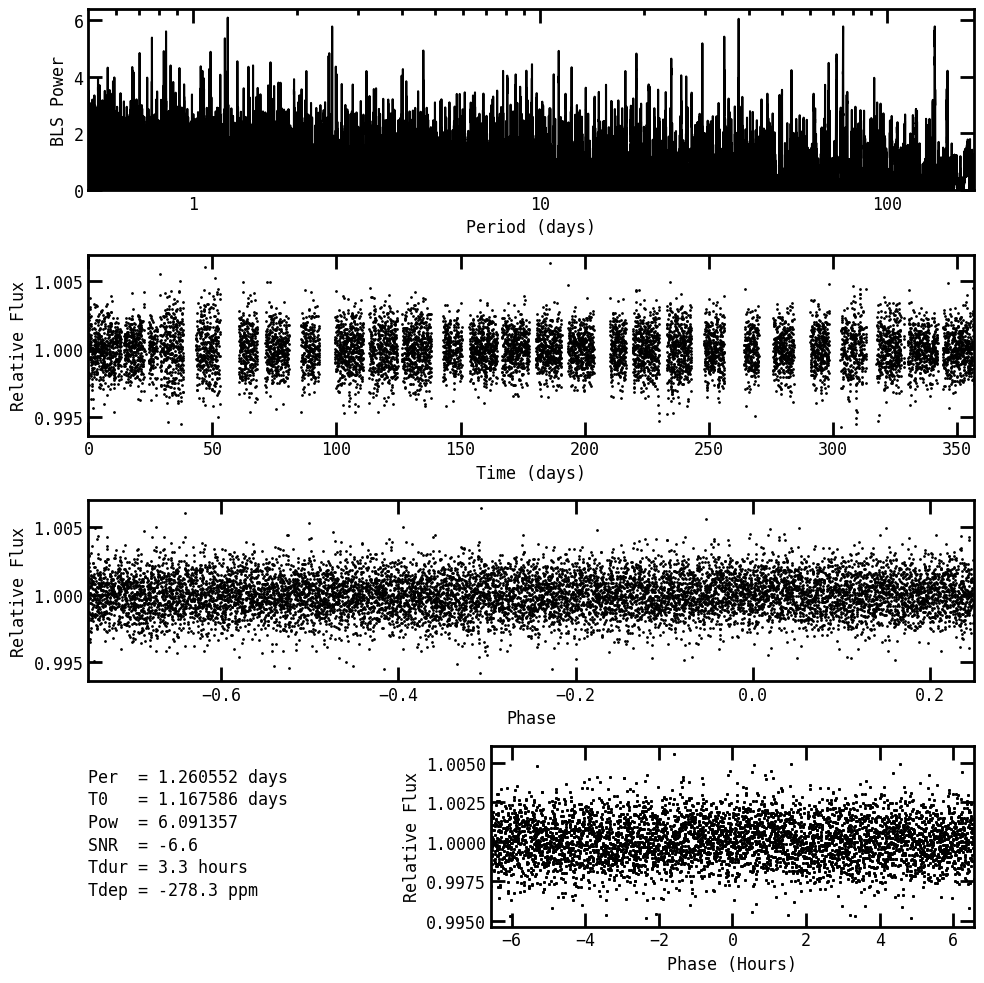

ρ (g/cm³):                      0.3497093
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:        -1.075e-06
t0 (days):                      1.0541451
Period (days):                  1.2605698
Impact parameter:               0.4108002
Rp/R*:                          7.136e-05
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


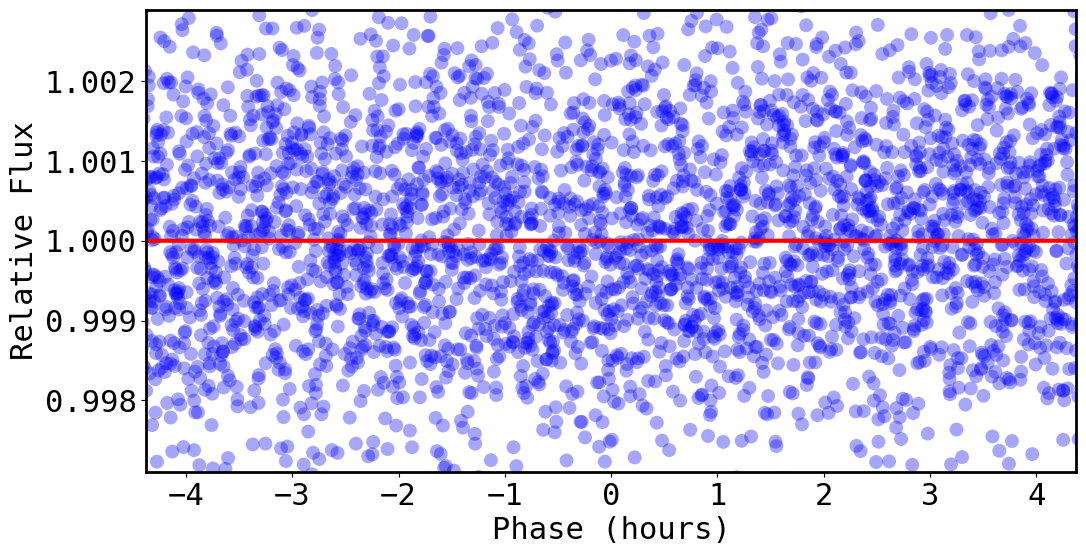


#7 - tlc29925580
freqs:  0.0060940804753187765 2.0
nstep:  127155


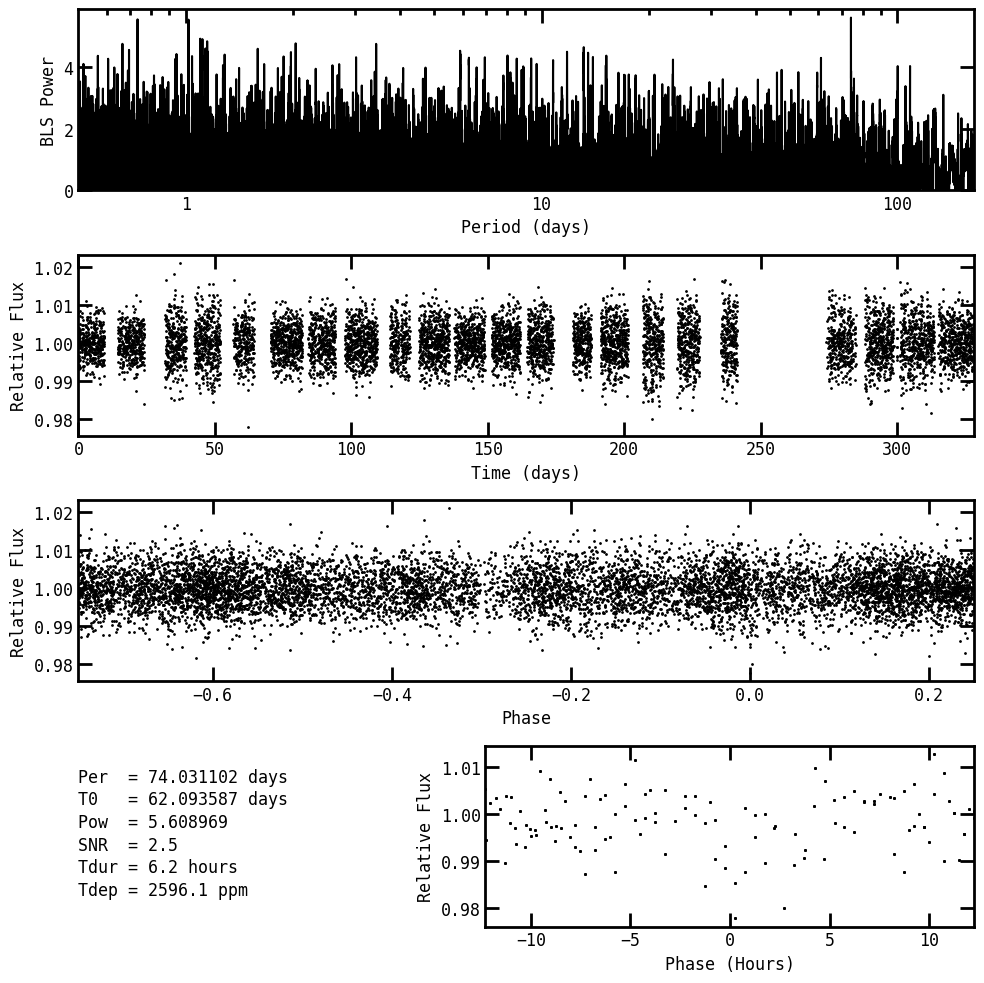

ρ (g/cm³):                      0.7597030
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:        -2.160e-06
t0 (days):                     62.1373845
Period (days):                 74.0435757
Impact parameter:               0.8077631
Rp/R*:                          0.0974723
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


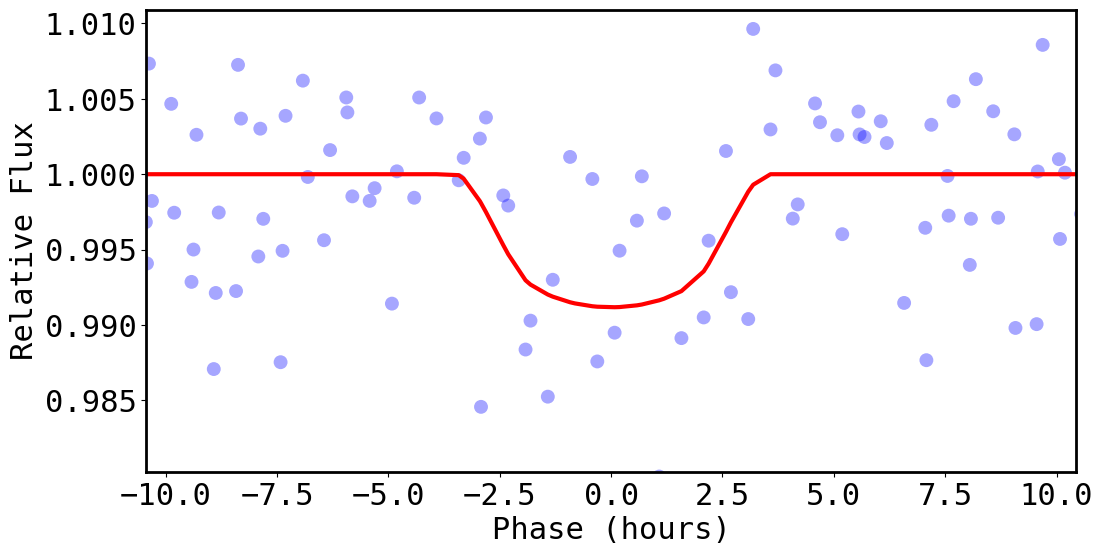


#8 - tlc29925839
freqs:  0.006094080642438959 2.0
nstep:  127390


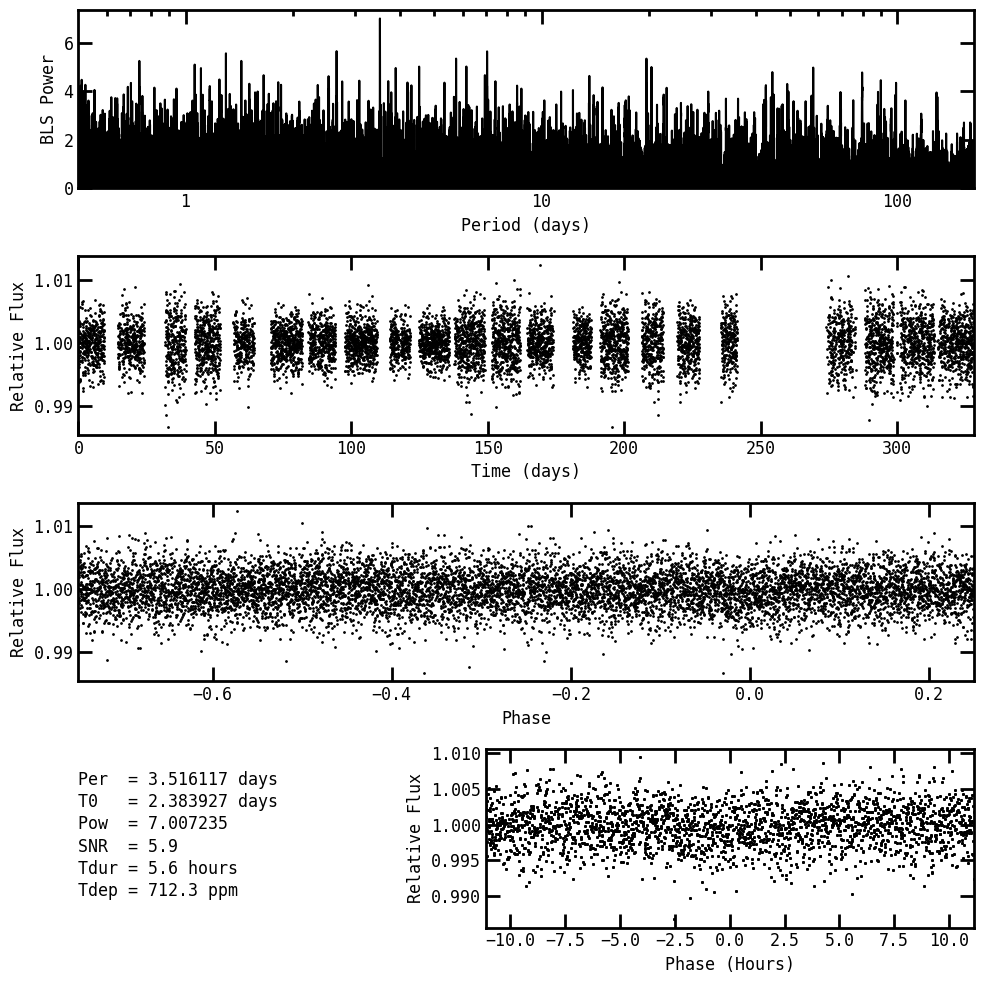

ρ (g/cm³):                      0.3861262
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:         4.954e-05
t0 (days):                      2.3525991
Period (days):                  3.5160606
Impact parameter:               0.4801758
Rp/R*:                          0.0291088
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


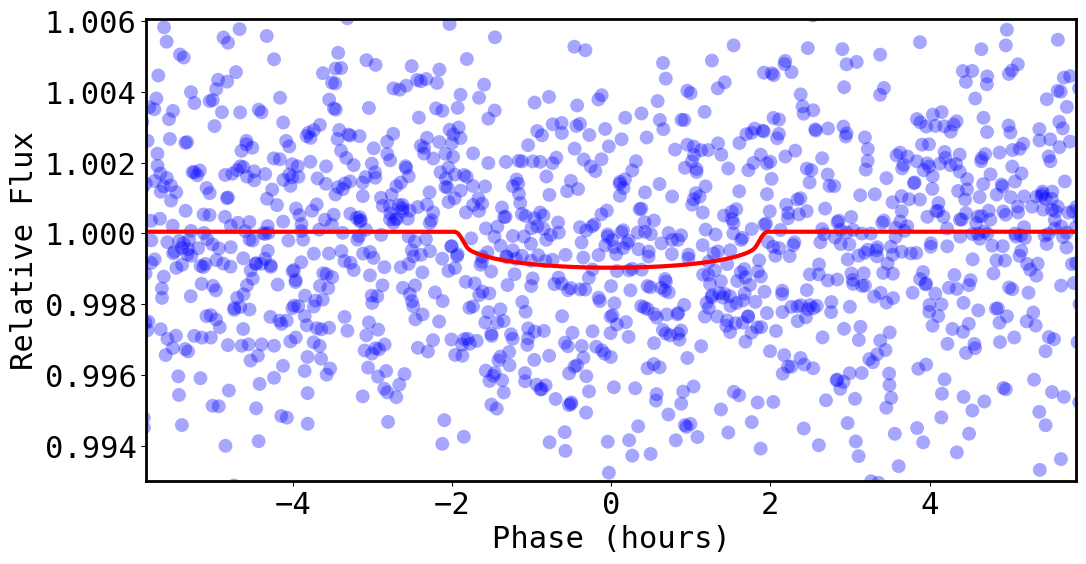


#9 - tlc29989382
freqs:  0.005602244489955149 2.0
nstep:  142044


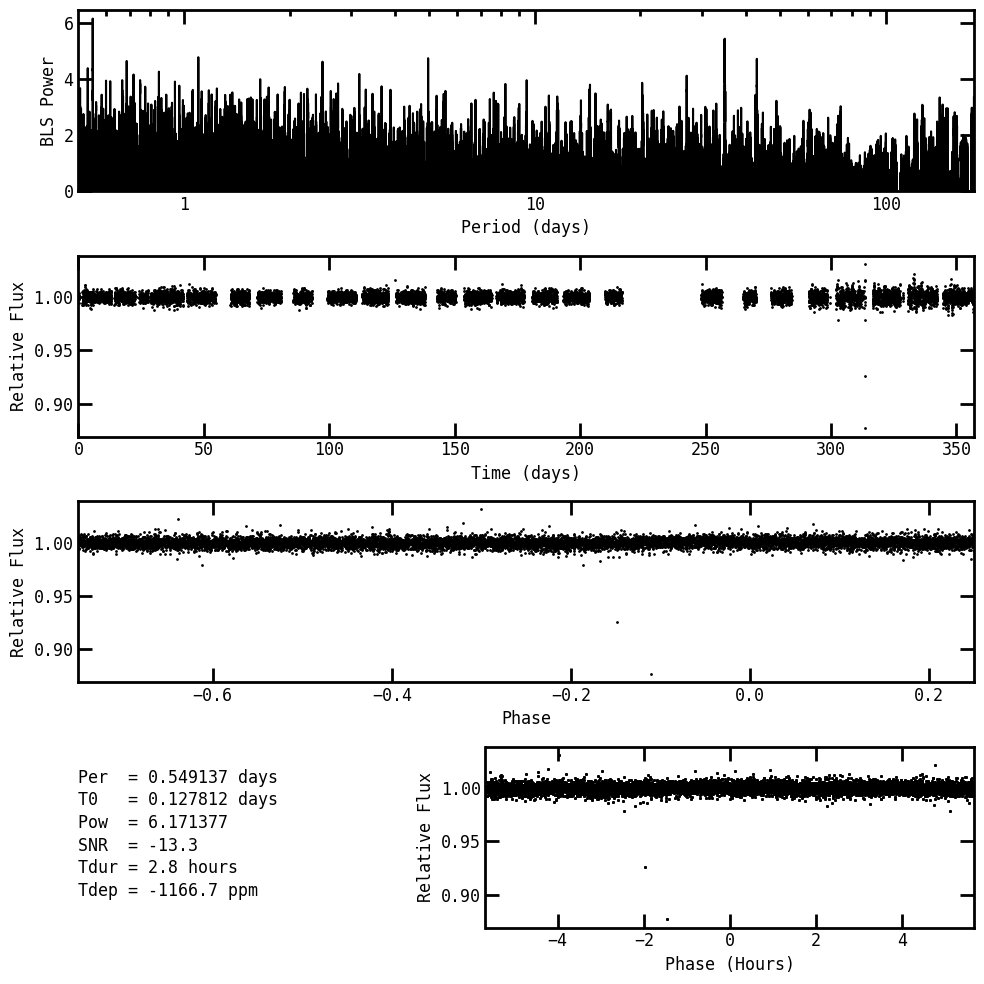

ρ (g/cm³):                      1.0932426
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:        -2.498e-06
t0 (days):                      0.1238067
Period (days):                  0.5520680
Impact parameter:               0.6652154
Rp/R*:                          1.003e-05
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


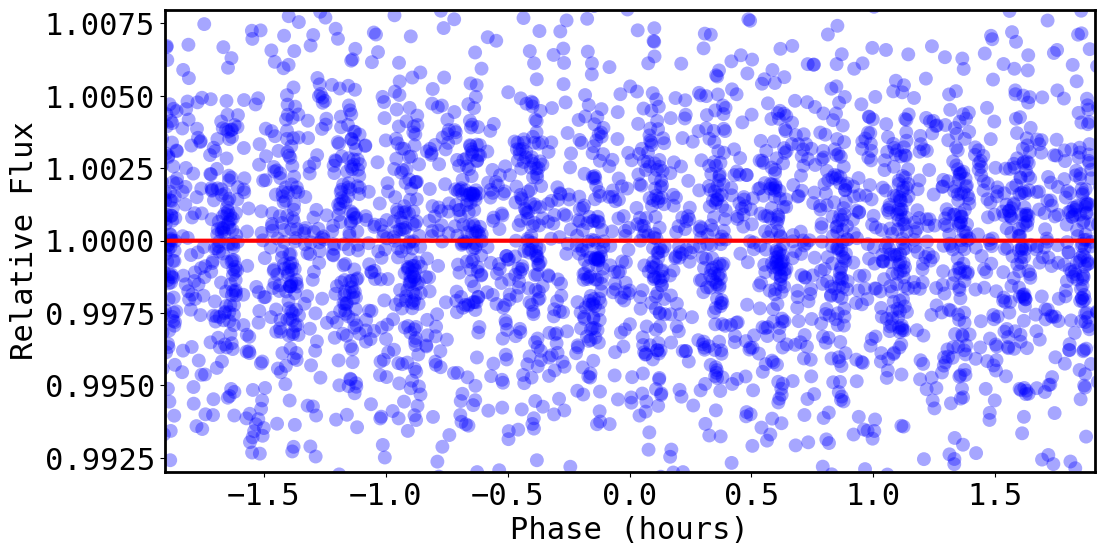

In [13]:
# Analyse directory

datadir = "/data2/TESS/ffisearch/cvzsearch_yr1/cvz1pt003" #"/data2/TESS/ffisearch/cvzsearch_yr1/cvz1toiv2"

n = 10
offset = 820

plot = True
save = False
file_output = "data/cvz_yr1_toi.csv"
id_to_save = np.array([0, 7, 8, 9, 10, 11])

# Create text file output
if save:
    createResultFile(file_output, id_to_save)

# Find all directories in folder
subdirectories = [x[0] for x in os.walk(datadir)][1+offset : n+1+offset]

for i, subdir in enumerate(subdirectories):
    head, tail = os.path.split(subdir)
    dataPath = head + "/" + tail +  "/" + tail + "_5.dn.dat"

    print(f"#{i} - {tail}")

    gbls_inputs = gbls.gbls_inputs_class()
    gbls_inputs.plots = 1 if plot else 0
    phot, sol_fit = analyseData(dataPath, gbls_inputs)

    # Output
    if plot:
        transitp.printParams(sol_fit)
        transitp.plotTransit(phot.time - gbls_inputs.zerotime, phot.flux + 1, sol_fit, phot.itime)
    if save:
        dataSeries = pd.Series(sol_fit[id_to_save])
        dataSeries = pd.concat([pd.Series([tail, gbls_ans.bpower, gbls_ans.depth*1e6]), dataSeries]).reset_index(drop=True)
        # Convert to dataFrame and float
        df = dataSeries.to_frame().T
        cols_to_float = df.columns[1:]
        df[cols_to_float] = df[cols_to_float].astype(float)
        df.to_csv(file_output, mode="a", float_format="%.8g", header=False, index=False)

    print("")